In [230]:
import pandas as pd  
import os

In [231]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Importing and cleaning files before mapping

In [232]:
folder_path = '/Users/brandonrhee/Desktop/zipcode_analysis/Data'

In [233]:
# four different data sets used to consolidate into one data set mapping zip codes with another
file_path1 = os.path.join(folder_path, 'household_size.csv')
file_path3 = os.path.join(folder_path, 'zip_county.xlsx')
file_path4 = os.path.join(folder_path, 'median_income.csv')
file_path5 = os.path.join(folder_path, 'income_limits.xlsx')

### Preprocessing zip_county.xlsx data 

In [234]:
zip_county = pd.read_excel(file_path3)
zip_county.head()

zip  county usps_zip_pref_city usps_zip_pref_state  res_ratio  bus_ratio  \
0  683   72125         SAN GERMAN                  PR   0.953036   0.996656   
1  683   72079         SAN GERMAN                  PR   0.000949   0.000000   
2  683   72023         SAN GERMAN                  PR   0.000791   0.001115   
3  683   72097         SAN GERMAN                  PR   0.000158   0.000000   
4  683   72121         SAN GERMAN                  PR   0.045066   0.002230   

   oth_ratio  tot_ratio  
0   0.980769   0.956300  
1   0.000000   0.000873  
2   0.000000   0.000800  
3   0.000000   0.000145  
4   0.019231   0.041882

In [235]:
#imported zip_county and utilizing only zip and county columns
zip_county = pd.read_excel(file_path3, dtype ={'zip':'string', 'county':'string'}, usecols = ['zip', 'county'])
zip_county.head()

zip county
0  00683  72125
1  00683  72079
2  00683  72023
3  00683  72097
4  00683  72121

### Preprocessing Household_size.csv data 

In [236]:
household_size = pd.read_csv(file_path1)
household_size.head()


/var/folders/77/wdwbtnl97pg9nkg8yvf_gg5r0000gn/T/ipykernel_24676/1367599204.py:1: DtypeWarning: Columns (2,3,4,5,10,11,12,13,18,19,20,21,34,35,36,37,78,79,80,81,86,87,88,89,94,95,96,97,110,111,112,113,154,155,156,157,162,163,164,165,170,171,172,173,186,187,188,189,230,231,232,233,238,239,240,241,246,247,248,249,262,263,264,265,306,307,308,309,338,339,340,341) have mixed types. Specify dtype option on import or set low_memory=False.
  household_size = pd.read_csv(file_path1)


GEO_ID                  NAME  \
0       Geography  Geographic Area Name   
1  860Z200US00601           ZCTA5 00601   
2  860Z200US00602           ZCTA5 00602   
3  860Z200US00603           ZCTA5 00603   
4  860Z200US00606           ZCTA5 00606   

                                  S1101_C01_001E  \
0  Estimate!!Total!!HOUSEHOLDS!!Total households   
1                                           5397   
2                                          12858   
3                                          19295   
4                                           1968   

                                     S1101_C01_001EA  \
0  Annotation of Estimate!!Total!!HOUSEHOLDS!!Tot...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      S1101_C01_001M  \
0  Margin of Error!!Total!!HOUSEHOLDS!!Total hous...   
1                                                264   
2                                                448   
3                                                555   
4                                                171   

                                     S1101_C01_001MA  \
0  Annotation of Margin of Error!!Total!!HOUSEHOL...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      S1101_C01_002E  \
0  Estimate!!Total!!HOUSEHOLDS!!Average household...   
1                                               3.16   
2                                               2.94   
3                                               2.49   
4                                               2.91   

                                      S1101_C01_002M  \
0  Margin of Error!!Total!!HOUSEHOLDS!!Average ho...   
1                                               0.16   
2                                               0.10   
3                                               0.06   
4                                               0.22   

                                     S1101_C01_002MA  \
0  Annotation of Margin of Error!!Total!!HOUSEHOL...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     S1101_C01_002EA  \
0  Annotation of Estimate!!Total!!HOUSEHOLDS!!Ave...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                              S1101_C01_003E  \
0  Estimate!!Total!!FAMILIES!!Total families   
1                                       3576   
2                                       8922   
3                                      12777   
4                                       1299   

                                     S1101_C01_003M  \
0  Margin of Error!!Total!!FAMILIES!!Total families   
1                                               291   
2                                               547   
3                                               662   
4                                               175   

                                     S1101_C01_003MA  \
0  Annotation of Margin of Error!!Total!!FAMILIES...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     S1101_C01_003EA  \
0  Annotation of Estimate!!Total!!FAMILIES!!Total...   
1          

In [237]:
#trim down columns we only care about and also split Name column and remove ZCTA5 the result is the zip code 
household_size = pd.read_csv(file_path1, usecols = ['NAME', 'S1101_C01_002E'], converters={'NAME': lambda s: s.split(' ')[1]})
household_size.head()

NAME                                     S1101_C01_002E
0   Area  Estimate!!Total!!HOUSEHOLDS!!Average household...
1  00601                                               3.16
2  00602                                               2.94
3  00603                                               2.49
4  00606                                               2.91

In [238]:
#drop first row
household_size.drop(0, axis = 0, inplace=True)
#rename columns for continuity 
household_size.rename(columns = {'NAME':'zip','S1101_C01_002E':'avg_size'}, inplace=True)
#removed rows where there was null median income 
household_size = household_size[household_size['avg_size'] != '-']
#converted avg size to float 
household_size = household_size.astype({'avg_size': 'float'})
#rounded avg_size
household_size['avg_size'] = household_size['avg_size'].apply(lambda n: round(n))
household_size.head()

zip  avg_size
1  00601         3
2  00602         3
3  00603         2
4  00606         3
5  00610         3

### Preprocessing median_income.csv data

In [239]:
median_income = pd.read_csv(file_path4)
median_income.head()

/var/folders/77/wdwbtnl97pg9nkg8yvf_gg5r0000gn/T/ipykernel_24676/3809771036.py:1: DtypeWarning: Columns (2,3,4,5,66,67,68,69,130,131,132,133,194,195,196,197) have mixed types. Specify dtype option on import or set low_memory=False.
  median_income = pd.read_csv(file_path4)


GEO_ID                  NAME               S1901_C01_001E  \
0       Geography  Geographic Area Name  Estimate!!Households!!Total   
1  860Z200US00601           ZCTA5 00601                         5397   
2  860Z200US00602           ZCTA5 00602                        12858   
3  860Z200US00603           ZCTA5 00603                        19295   
4  860Z200US00606           ZCTA5 00606                         1968   

                       S1901_C01_001M  \
0  Margin of Error!!Households!!Total   
1                                 264   
2                                 448   
3                                 555   
4                                 171   

                                    S1901_C01_001MA  \
0  Annotation of Margin of Error!!Households!!Total   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                             S1901_C01_001EA  \
0  Annotation of Estimate!!Households!!Total   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

                                   S1901_C01_002E  \
0  Estimate!!Households!!Total!!Less than $10,000   
1                                            33.2   
2                                            27.1   
3                                            32.1   
4                                            28.4   

                                      S1901_C01_002M  \
0  Margin of Error!!Households!!Total!!Less than ...   
1                                                4.4   
2                                                2.9   
3                                                2.5   
4                                                5.5   

                                     S1901_C01_002MA  \
0  Annotation of Margin of Error!!Households!!Tot...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     S1901_C01_002EA  \
0  Annotation of Estimate!!Households!!Total!!Les...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                    S1901_C01_003E  \
0  Estimate!!Households!!Total!!$10,000 to $14,999   
1                                             15.7   
2                                             12.7   
3                                             13.4   
4                                             13.3   

                                      S1901_C01_003M  \
0  Margin of Error!!Households!!Total!!$10,000 to...   
1                                                2.9   
2                                                2.1   
3                                                1.6   
4                                                4.4   

                                     S1901_C01_003MA  \
0  Annotation of Margin of Error!!Households!!Tot...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     S1901_C01_003EA  \
0  Annotation of Estimate!!Households!!Total!!$10...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                    S1901_C01

In [240]:
#trim down columns we only care about and also split Name column and remove ZCTA5 the result is the zip code 
median_income = pd.read_csv(file_path4, usecols=['NAME', 'S1901_C01_012E'], dtype = {'S1901_C01_012E': 'object'}, converters={'NAME': lambda s: s.split(' ')[1]})
#dropped first row 
median_income.drop(0, axis = 0, inplace=True)
#renamed columns for continuity 
median_income.rename(columns = {'NAME':'zip','S1901_C01_012E':'median_income'}, inplace=True)
#median incoe column has zip code but no median income
median_income = median_income[median_income['median_income'] != '-']
median_income.head()

zip median_income
1  00601         15292
2  00602         18716
3  00603         16789
4  00606         18835
5  00610         21239

### Preprocessing income_limits.xlsx data

In [241]:
income_limit = pd.read_excel(file_path5)
income_limit.head()

fips2010           cbsasub                                  areaname  \
0  100199999  METRO33860M33860                        Montgomery, AL MSA   
1  100399999  METRO19300M19300             Daphne-Fairhope-Foley, AL MSA   
2  100599999  NCNTY01005N01005                        Barbour County, AL   
3  100799999  METRO13820M13820  Birmingham-Hoover, AL HUD Metro FMR Area   
4  100999999  METRO13820M13820  Birmingham-Hoover, AL HUD Metro FMR Area   

   state  Lim30_22p1  Lim30_22p2  Lim30_22p3  Lim30_22p4  Lim30_22p5  \
0      1       15900       18150       20400       22650       24500   
1      1       18000       20550       23100       25650       27750   
2      1       12950       14800       16650       18500       20000   
3      1       17850       20400       22950       25450       27500   
4      1       17850       20400       22950       25450       27500   

   Lim30_22p6  Lim30_22p7  Lim30_22p8  lim50_22p1  lim50_22p2  lim50_22p3  \
0       26300       28100       29900       26450       30200       34000   
1       29800       31850       33900       29950       34200       38500   
2       21500       22950       24450       21600       24650       27750   
3       29550       31600       33600       29700       33950       38200   
4       29550       31600       33600       29700       33950       38200   

   lim50_22p4  lim50_22p5  lim50_22p6  lim50_22p7  lim50_22p8  Lim60_22p1  \
0       37750       40800       43800       46850       49850       31740   
1       42750       46200       49600       53050       56450       35940   
2       30800       33300       35750       38200       40700       25920   
3       42400       45800       49200       52600       56000       35640   
4       42400       45800       49200       52600       56000       35640   

   Lim60_22p2  Lim60_22p3  Lim60_22p4  Lim60_22p5  Lim60_22p6  Lim60_22p7  \
0       36240       40800       45300       48960       52560       56220   
1       41040       46200       51300       55440       59520       63660   
2       29580       33300       36960       39960       42900       45840   
3       40740       45840       50880       54960       59040       63120   
4       40740       45840       50880       54960       59040       63120   

   Lim60_22p8  Lim80_22p1  Lim80_22p2  Lim80_22p3  Lim80_22p4  Lim80_22p5  \
0       59820       42300       48350       54400       60400       65250   
1       67740       47900       54750       61600       68400       73900   
2       48840       34550       39450       44400       49300       53250   
3       67200       47500       54300       61100       67850       73300   
4       67200       47500       54300       61100       67850       73300   

   Lim80_22p6  Lim80_22p7  Lim80_22p8  lim120_22p1  lim120_22p2  lim120_22p3  \
0       70100       74900       79750        63400        72500        81550   
1       79350       84850       90300        71800        82100        92350   
2       57200       61150       65100        51750        59150        66550   
3       78750       84150       89600        71250        81400        91600   
4       78750       84150       89600        71250        81400        91600   

   lim120_22p4  lim120_22p5  lim120_22p6  lim120_22p7  lim120_22p8 statename  \
0        90600        97850       105100       112350       119600   ALABAMA   
1       102600       110800       119000       127200       135450   ALABAMA   
2        73900        79850        85750        91650        97550   ALABAMA   
3       101750       109900       118050       126200       134300   ALABAMA   
4       101750       109900       118050       126200       134300   ALABAMA   

   county  
0       1  
1       3  
2       5  
3       7  
4       9

In [242]:
# original dataset has income limits for very and extremely low income 
# lim80 stands for 80% of the median income limits for the specific county
# 80% of the median income is considere 'low income'

# retrieve columns that have 'lim80' or columns that have 'fips2010'.
income_limit = pd.read_excel(file_path5, usecols=lambda col: 'Lim80' in col or col == 'fips2010', converters={'fips2010': lambda s: s[:5]})
#renamed all columns that have 'lim80_22'
income_limit.rename(columns=lambda col: col.replace('Lim80_22', '') if col != 'fips2010' else 'county', inplace=True)

In [243]:
income_limit.head()

county     p1     p2     p3     p4     p5     p6     p7     p8
0  01001  42300  48350  54400  60400  65250  70100  74900  79750
1  01003  47900  54750  61600  68400  73900  79350  84850  90300
2  01005  34550  39450  44400  49300  53250  57200  61150  65100
3  01007  47500  54300  61100  67850  73300  78750  84150  89600
4  01009  47500  54300  61100  67850  73300  78750  84150  89600

Looking athe 'ex' data frame below, there are multiple income limits for the same county. Not addressing this early on will result in the function later to only utilize the first row for looking up income limits. 

To address this, the method will be to group by county and get the average per income limit household size. 

In [244]:
ex = income_limit[income_limit['county'] == '25027']
ex.head()

county     p1     p2     p3     p4     p5      p6      p7      p8
2185  25027  56150  64150  72150  80150  86600   93000   99400  105800
2186  25027  54750  62550  70350  78150  84450   90700   96950  103200
2187  25027  61900  70750  79600  88400  95500  102550  109650  116700
2188  25027  61900  70750  79600  88400  95500  102550  109650  116700
2189  25027  62600  71550  80500  89400  96600  103750  110900  118050

In [245]:
#group by counties and averge. This is to account for regions that have multiple zip codes and income limits but the same county 
income_limit = income_limit.groupby('county').mean()
income_limit.reset_index()

county             p1             p2             p3             p4  \
0     01001   42300.000000   48350.000000   54400.000000   60400.000000   
1     01003   47900.000000   54750.000000   61600.000000   68400.000000   
2     01005   34550.000000   39450.000000   44400.000000   49300.000000   
3     01007   47500.000000   54300.000000   61100.000000   67850.000000   
4     01009   47500.000000   54300.000000   61100.000000   67850.000000   
5     01011   34550.000000   39450.000000   44400.000000   49300.000000   
6     01013   34550.000000   39450.000000   44400.000000   49300.000000   
7     01015   38550.000000   44050.000000   49550.000000   55050.000000   
8     01017   34550.000000   39450.000000   44400.000000   49300.000000   
9     01019   34550.000000   39450.000000   44400.000000   49300.000000   
10    01021   35400.000000   40450.000000   45500.000000   50550.000000   
11    01023   34550.000000   39450.000000   44400.000000   49300.000000   
12    01025   34550.000000   39450.000000   44400.000000   49300.000000   
13    01027   34550.000000   39450.000000   44400.000000   49300.000000   
14    01029   35000.000000   40000.000000   45000.000000   50000.000000   
15    01031   42100.000000   48100.000000   54100.000000   60100.000000   
16    01033   38200.000000   43650.000000   49100.000000   54550.000000   
17    01035   34550.000000   39450.000000   44400.000000   49300.000000   
18    01037   34550.000000   39450.000000   44400.000000   49300.000000   
19    01039   35400.000000   40450.000000   45500.000000   50550.000000   
20    01041   35950.000000   41100.000000   46250.000000   51350.000000   
21    01043   35950.000000   41050.000000   46200.000000   51300.000000   
22    01045   35750.000000   40850.000000   45950.000000   51050.000000   
23    01047   34550.000000   39450.000000   44400.000000   49300.000000   
24    01049   34550.000000   39450.000000   44400.000000   49300.000000   
25    01051   42300.000000   48350.000000   54400.000000   60400.000000   
26    01053   34550.000000   39450.000000   44400.000000   49300.000000   
27    01055   35400.000000   40450.000000   45500.000000   50550.000000   
28    01057   34550.000000   39450.000000   44400.000000   49300.000000   
29    01059   34550.000000   39450.000000   44400.000000   49300.000000   
30    01061   38850.000000   44400.000000   49950.000000   55450.000000   
31    01063   34550.000000   39450.000000   44400.000000   49300.000000   
32    01065   43500.000000   49700.000000   55900.000000   62100.000000   
33    01067   37800.000000   43200.000000   48600.000000   54000.000000   
34    01069   38850.000000   44400.000000   49950.000000   55450.000000   
35    01071   34550.000000   39450.000000   44400.000000   49300.000000   
36    01073   47500.000000   54300.000000   61100.000000   67850.000000   
37    01075   34550.000000   39450.000000   44400.000000   49300.000000   
38    01077   38200.000000   43650.000000   49100.000000   54550.000000   
39    01079   39550.000000   45200.000000   50850.000000   56500.000000   
40    01081   48850.000000   55800.000000   62800.000000   69750.000000   
41    01083   51950.000000   59350.000000   66750.000000   74150.000000   
42    01085   42300.000000   48350.000000   54400.000000   60400.000000   
43    01087   34550.000000   39450.000000   44400.000000   49300.000000   
44    01089   51950.000000   59350.000000   66750.000000   74150.000000   
45    01091   34650.000000   39600.000000   44550.000000   49500.000000   
46    01093   34550.000000   39450.000000   44400.000000   49300.000000   
47    01095   35500.000000   40600.000000   45650.000000   50700.000000   
48    01097   36600.000000   41800.000000   47050.000000   52250.000000   
49    01099   34550.000000   39450.000000   44400.000000   49300.000000   
50    01101   42300.000000   48350.000000   54400.000000   60400.000000   
51    01103   39550.000000   45200.000000   50850.000000   56500.000000   
52    01105   34550.000000   3

county == 25027 is grouped and averaged


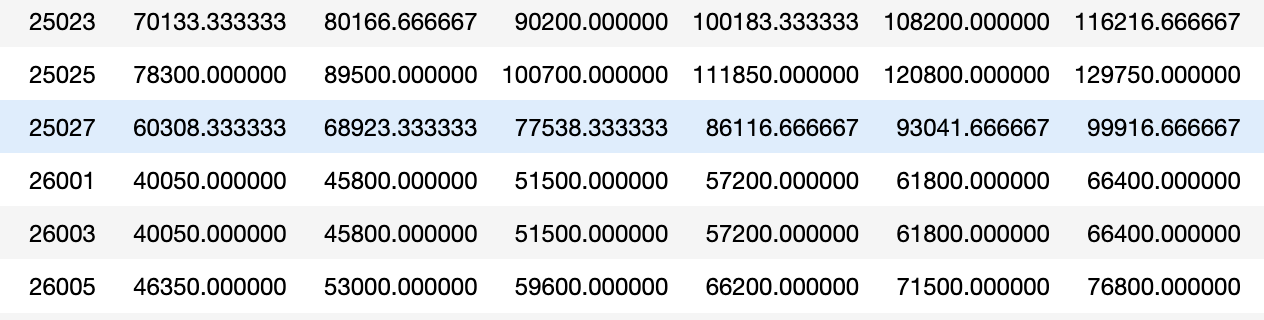

### Merge datasets

In [246]:
#merge median_income to zip_county by using inner join on zip column
merged_data = pd.merge(zip_county, median_income, how='inner', on=['zip'])
#merged household_size to merged data dataframe by using inner join on zip column 
merged_data = pd.merge(merged_data, household_size, how='inner', on=['zip'])
#merged income limit to merged_data by inner join on county zip column 
merged_data = pd.merge(merged_data, income_limit, how='inner', on=['county'])

In [247]:
merged_data.head()

zip county median_income  avg_size       p1       p2       p3       p4  \
0  00683  72125         16764         3  14300.0  16350.0  18400.0  20400.0   
1  00683  72079         16764         3  14300.0  16350.0  18400.0  20400.0   
2  00667  72079         15426         3  14300.0  16350.0  18400.0  20400.0   
3  00683  72023         16764         3  14300.0  16350.0  18400.0  20400.0   
4  00622  72023         17728         3  14300.0  16350.0  18400.0  20400.0   

        p5       p6       p7       p8  
0  22050.0  23700.0  25300.0  26950.0  
1  22050.0  23700.0  25300.0  26950.0  
2  22050.0  23700.0  25300.0  26950.0  
3  22050.0  23700.0  25300.0  26950.0  
4  22050.0  23700.0  25300.0  26950.0

In [248]:
#function to retrieve column name corresponding to the avg household size using f string
def get_income_limit_for_household(row):
    try:
        col_name = f"p{row.avg_size}"
        return row[col_name]
    except KeyError:
        return '-'

In [249]:
#finalized look up by retrieve low_income_limit based on average size. 
merged_data['low_income_limit'] = merged_data.apply(get_income_limit_for_household, axis = 1)
merged_data.sample(5)

zip county median_income  avg_size       p1       p2       p3  \
37142  75428  48231         45614         2  54550.0  62350.0  70150.0   
29575  54499  55115         56641         2  45000.0  51400.0  57850.0   
24364  44011  39093        113741         3  47850.0  54650.0  61500.0   
1640   07040  34039        156477         3  62600.0  71550.0  80500.0   
1160   05907  50009         48000         2  48000.0  54850.0  61700.0   

            p4       p5        p6        p7        p8  low_income_limit  
37142  77900.0  84150.0   90400.0   96600.0  102850.0           62350.0  
29575  64250.0  69400.0   74550.0   79700.0   84850.0           51400.0  
24364  68300.0  73800.0   79250.0   84700.0   90200.0           61500.0  
1640   89400.0  96600.0  103750.0  110900.0  118050.0           80500.0  
1160   68550.0  74050.0   79550.0   85050.0   90500.0           54850.0

In [267]:
#showcases all the values that have a zipcode, but no median income for the value or needed average size for low_income_limit
merged_data[merged_data['low_income_limit'] == '-']

Empty DataFrame
Columns: [zip, county, median_income, avg_size, p1, p2, p3, p4, p5, p6, p7, p8, low_income_limit]
Index: []

In [251]:
#removing rows where 'median_income' & 'low_income_limit' does not have a value
merged_data = merged_data[merged_data['low_income_limit'] != '-']
merged_data = merged_data[merged_data['median_income'] != '-']

In [252]:
#group by zipcode and averaged low_income_limit. 
#This is to account for records that have multiple zip codes 
avg_income_data = merged_data.groupby('zip', as_index=False)['low_income_limit'].mean()

In [260]:
x = pd.merge(merged_data, avg_income_data, how = 'inner', on=['zip'])
x = x.drop_duplicates

In [261]:
#Function to retreieve income status from row. 
#median_income table has some values that contain '+', ','. Remove these
#If low_income_limit > adjusted income, the zip code is considered low income. 

def get_income_status_from_row(row):
    median_income = row.median_income.replace('+', '').replace(',','').replace('-', '')
    adjusted_income = int(median_income) * .8
    return 'LOW' if row.low_income_limit > adjusted_income else 'NORMAL'


In [262]:
x = merged_data[['zip','median_income','low_income_limit']]
x.head()

zip median_income  low_income_limit
0  00683         16764           18400.0
1  00683         16764           18400.0
2  00667         15426           18400.0
3  00683         16764           18400.0
4  00622         17728           18400.0

In [263]:
x['income_status'] = x.apply(get_income_status_from_row, axis = 1)
final_data = x[['zip','income_status']]

/var/folders/77/wdwbtnl97pg9nkg8yvf_gg5r0000gn/T/ipykernel_24676/2890255904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['income_status'] = x.apply(get_income_status_from_row, axis = 1)


In [264]:
final_data = final_data.drop_duplicates(keep = 'last')

In [265]:
final_data.sort_values(by='zip',ascending=True)

zip income_status
40616  00601           LOW
45004  00602           LOW
45010  00603           LOW
45001  00606           LOW
43447  00610           LOW
43453  00611           LOW
43451  00612           LOW
30254  00616           LOW
35030  00617           LOW
4      00622           LOW
8      00623           LOW
38155  00624           LOW
45078  00627           LOW
44548  00631           LOW
14     00637           LOW
45048  00638           LOW
43452  00641           LOW
44663  00646        NORMAL
44764  00647           LOW
35028  00650           LOW
30251  00652        NORMAL
44763  00653           LOW
38153  00656           LOW
43450  00659           LOW
45049  00660           LOW
45011  00662           LOW
45070  00664           LOW
13     00667           LOW
44547  00669           LOW
20735  00670           LOW
40637  00674           LOW
40620  00676           LOW
43454  00677        NORMAL
44668  00678           LOW
45050  00680           LOW
10     00682           LOW
12     00683           LOW
40621  00685           LOW
40635  00687           LOW
30249  00688           LOW
20736  00690           LOW
40634  00692           LOW
40636  00693           LOW
44762  00698           LOW
44843  00703           LOW
42755  00704           LOW
43460  00705           LOW
44183  00707           LOW
40638  00714           LOW
38146  00715           LOW
38150  00716           LOW
38147  00717           LOW
44958  00718           LOW
44919  00719           LOW
45037  00720           LOW
38164  00723           LOW
44842  00725           LOW
38157  00727        NORMAL
38144  00728           LOW
38169  00729           LOW
38149  00730           LOW
38151  00731           LOW
35037  00735           LOW
43458  00736           LOW
45039  00738           LOW
44844  00739           LOW
35032  00740           LOW
37433  00741           LOW
38171  00745           LOW
43464  00751           LOW
44840  00754           LOW
43463  00757           LOW
43904  00765           LOW
44869  00766           LOW
40640  00767           LOW
43462  00769           LOW
44957  00771           LOW
37437  00772           LOW
45040  00773           LOW
42754  00775        NORMAL
41909  00777           LOW
44841  00778        NORMAL
38145  00780           LOW
42757  00782           LOW
44671  00783           LOW
45065  00784           LOW
41911  00791           LOW
44672  00794           LOW
40641  00795           LOW
30     00901        NORMAL
39     00907        NORMAL
44413  00909           LOW
37     00911        NORMAL
18     00912        NORMAL
41     00913           LOW
38     00915           LOW
42790  00917           LOW
42     00918        NORMAL
42784  00920        NORMAL
42786  00921           LOW
17     00923           LOW
42778  00924           LOW
44     00925           LOW
44408  00926        NORMAL
31     00927        NORMAL
44666  00949        NORMAL
30259  00951           LOW
30255  00952           LOW
44665  00953           LOW
44765  00956           LOW
44667  00957           LOW
42788  00959        NORMAL
44416  00961        NORMAL
44412  00962           LOW
44410  00965           LOW
42793  00966        NORMAL
42792  00968        NORMAL
42783  00969        NORMAL
42787  00971           LOW
44411  00976        NORMAL
20743  00979        NORMAL
20741  00982        NORMAL
20740  00983           LOW
20746  00985        NORMAL
42779  00987        NORMAL
61     01001           LOW
272    01002           LOW
153    01005        NORMAL
267    01007        NORMAL
183    01008        NORMAL
53     01009           LOW
46     01010        NORMAL
89     01010           LOW
251    01011           LOW
261    01012           LOW
71     01013           LOW
78     01020           LOW
52     01022           LOW
259    01026        NORMAL
269    01027           LOW
82     01028        NORMAL
193    01029        NORMAL
58     01030        NORMAL
169    01031           LOW
257    01032        NORMAL
268    01033        NORMAL
59     01034        NORMAL
252    01035 

In [266]:
len(final_data)

32019

In [222]:
final_data.to_excel('zip.xlsx', index = False)